# Predicting The Weather Using Machine Learning

We'll be working with weather data from a station at the Oakland International Airport. The data is from 1960 through 2021. Each row in the data represents one day, and the columns represent different weather measurements. 

Here are the primary columns that we need:
* PRCP — total precipitation
* TMAX — maximum daily temperature
* TMIN — minimum daily temperature
* SNOW — the total daily snowfall
* SNWD — total snow depth on the ground

In [1]:
import warnings
warnings.simplefilter(action='ignore')

# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

# ML Libraries
from sklearn.model_selection import cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_selection import SequentialFeatureSelector

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

**Load Dataset**

In [2]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WSF1,WSF2,WSF5,WSFG,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,49.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,49.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,54.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,54.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,55.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
weather.tail()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WSF1,WSF2,WSF5,WSFG,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,60.0,39.0,NaN,NaN,290.0,290.0,NaN,NaN,15.0,17.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,57.0,43.0,NaN,NaN,290.0,300.0,NaN,NaN,12.1,13.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,57.0,41.0,NaN,NaN,230.0,290.0,NaN,NaN,6.9,8.9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-27,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,3.13,NaN,NaN,NaN,NaN,1526.0,0.0,NaN,NaN,NaN,67.0,39.0,NaN,NaN,100.0,310.0,NaN,NaN,8.9,12.1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,64.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Review Dataset**

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

### Preparing the Data
We'll create our dataframe to include only the primary columns and rename them for clarity.

In [5]:
df = weather[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]
df.columns = ['precipitation', 'max_temp', 'min_temp', 'total_snow', 'snow_depth']
df.head()

,precipitation,max_temp,min_temp,total_snow,snow_depth
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  16578 non-null  float64
 1   max_temp       16850 non-null  float64
 2   min_temp       16849 non-null  float64
 3   total_snow     11380 non-null  float64
 4   snow_depth     11504 non-null  float64
dtypes: float64(5)
memory usage: 790.3+ KB


### Filling in Missing Data
We'll examine which columns are relevant in our dataset and fill in the missing data in those columns and drop the others.

In [7]:
df.isnull().sum()

precipitation     281
max_temp            9
min_temp           10
total_snow       5479
snow_depth       5355
dtype: int64

In [8]:
df['total_snow'].value_counts(dropna=False)

0.0    11379
NaN     5479
1.0        1
Name: total_snow, dtype: int64

In [9]:
df['snow_depth'].value_counts(dropna=False)

0.0    11504
NaN     5355
Name: snow_depth, dtype: int64

Values here are irrelevant. We'll drop the fields.

In [10]:
df.drop(columns=['total_snow', 'snow_depth'], inplace=True)
df.head()

,precipitation,max_temp,min_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [11]:
df.describe()

,precipitation,max_temp,min_temp
count,16578.00000,16850.000000,16849.000000
mean,0.04774,65.675668,50.431539
std,0.18704,8.382314,6.739899
min,0.00000,38.000000,1.000000
25%,0.00000,60.000000,46.000000
50%,0.00000,65.000000,51.000000
75%,0.00000,71.000000,56.000000
max,4.53000,122.000000,69.000000


**Filling the Precipitation Field**

In [12]:
df['precipitation'].value_counts(dropna=False).head(10)

0.00    13664
0.01      438
NaN       281
0.02      199
0.03      122
0.04      102
0.05       98
0.06       85
0.07       76
0.08       71
Name: precipitation, dtype: int64

A significant number of the values in the precipitation field are 0. We'll fill the nan values with 0.0.

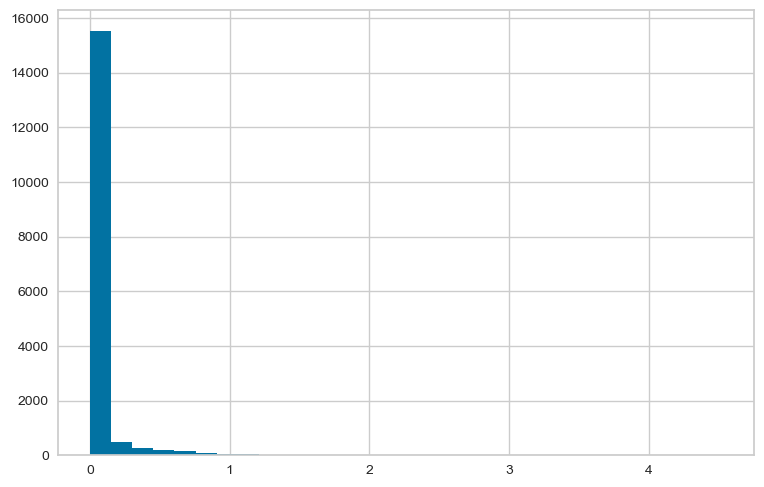

In [13]:
df['precipitation'].fillna(0, inplace=True)
df['precipitation'].hist(bins=30)
plt.show()

**Filling the Max and Min Temp Fields**

In [14]:
df['max_temp'].describe()

count    16850.000000
mean        65.675668
std          8.382314
min         38.000000
25%         60.000000
50%         65.000000
75%         71.000000
max        122.000000
Name: max_temp, dtype: float64

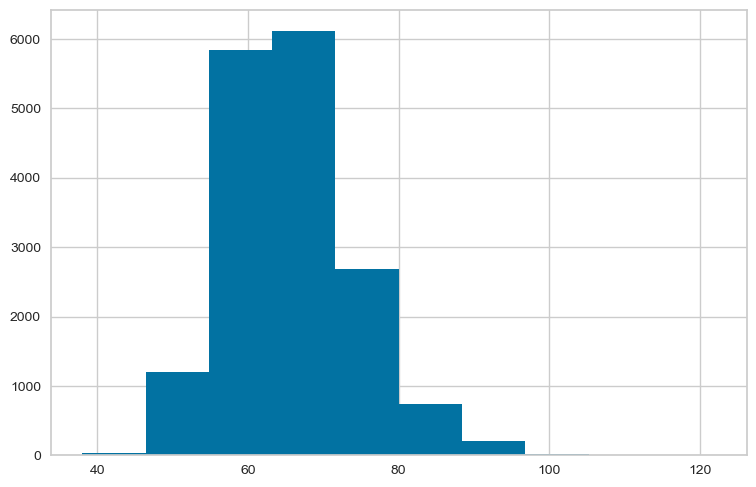

In [15]:
df['max_temp'].hist()
plt.show()

In [16]:
df['max_temp'].mode()

0    67.0
Name: max_temp, dtype: float64

This field is normally distributed. We'll replace the few missing values using 'ffill', i.e. forward fill, which fills the missing values with the last valid observation.

In [17]:
df['max_temp'].fillna(method="ffill", inplace=True)
df['max_temp'].isnull().sum()

0

In [18]:
df['min_temp'].describe()

count    16849.000000
mean        50.431539
std          6.739899
min          1.000000
25%         46.000000
50%         51.000000
75%         56.000000
max         69.000000
Name: min_temp, dtype: float64

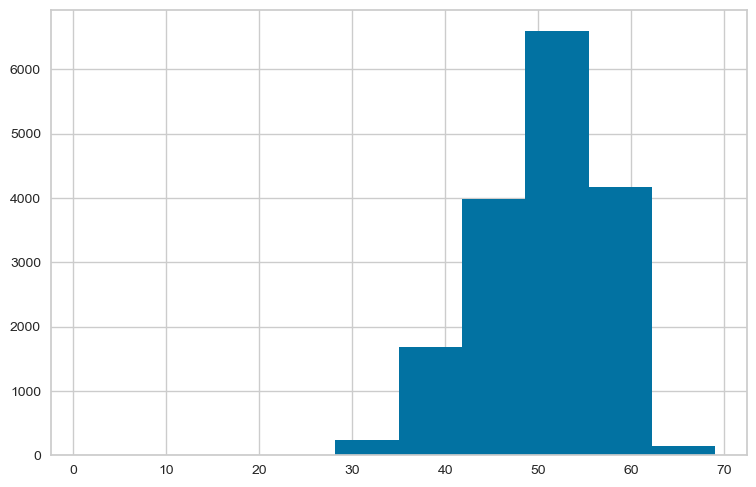

In [19]:
df['min_temp'].hist()
plt.show()

In [20]:
df['min_temp'].mode()

0    55.0
Name: min_temp, dtype: float64

Beyond an outlier minimum value, this field is normally distributed. We will fill the few missing values with the field mean.

In [21]:
df['min_temp'].fillna(method="ffill", inplace=True)
df['min_temp'].isnull().sum()

0

Let's check to see if the value 9999, which indicates a measurement error, is in any of the columns.

In [22]:
for index, row in df.iterrows():
    for value in row:
        if 9999 in row:
            print(index, row)

In [23]:
df.apply(lambda x: (x == 9999).sum())

precipitation    0
max_temp         0
min_temp         0
dtype: int64

### Verifying Data Types
Machine learning algorithms can only work with numeric data types. Let's confirm that our datatypes are numeric. Additionally, having our index in the correct datetime format will enable us to calculate predictor columns more easily.

In [24]:
df.head()

,precipitation,max_temp,min_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  16859 non-null  float64
 1   max_temp       16859 non-null  float64
 2   min_temp       16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


In [26]:
type(df.index)

pandas.core.indexes.base.Index

In [27]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Analyzing Weather Data
We'll visually analyze all the fields in the data to determine trends.

**Precipitation**

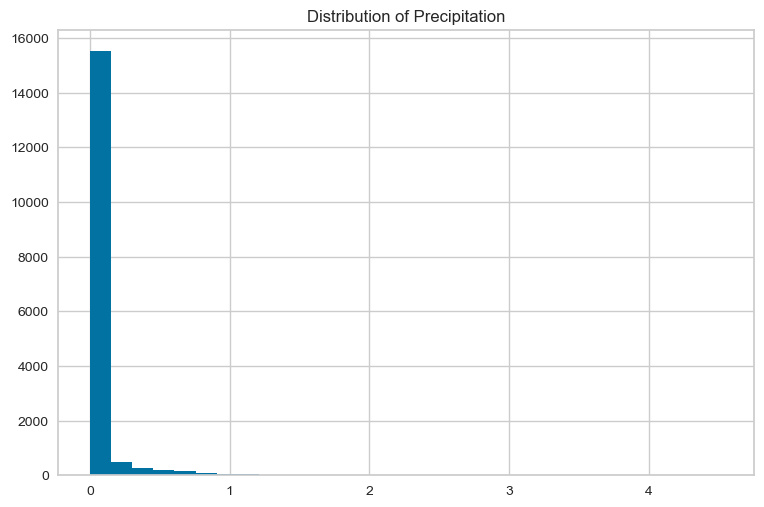

In [28]:
df['precipitation'].hist(bins=30)
plt.title('Distribution of Precipitation')
plt.show()

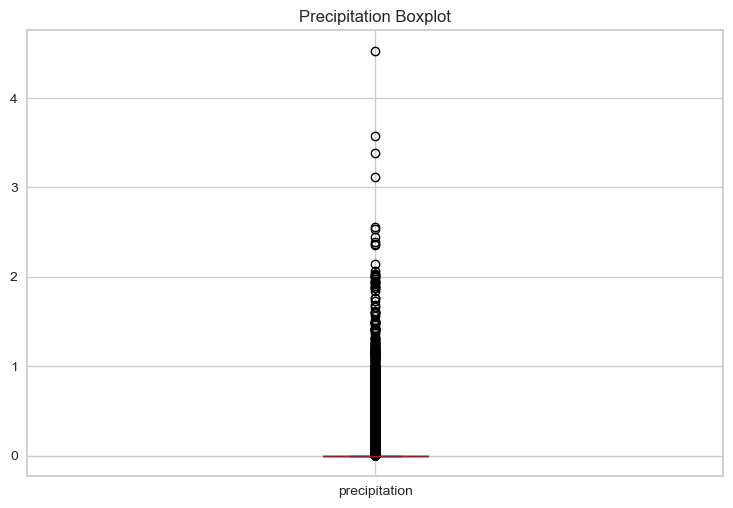

In [29]:
df['precipitation'].plot.box()
plt.title('Precipitation Boxplot')
plt.show()

Most precipitation values are in the 0 range, with a number of outliers.

Let's plot precipitation over time.

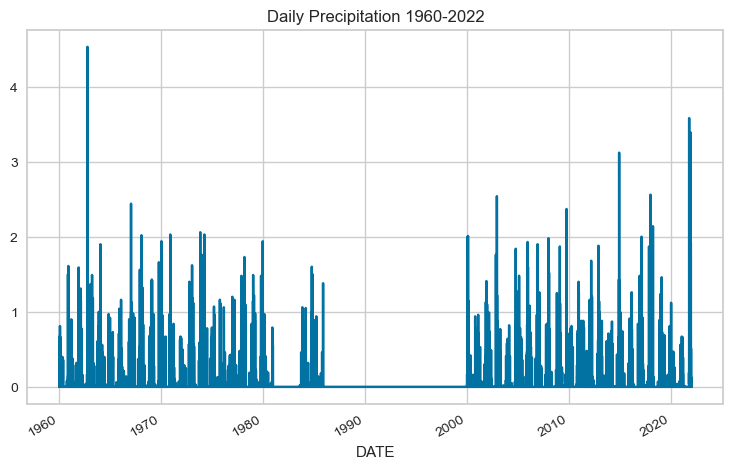

In [30]:
df['precipitation'].plot()
plt.title('Daily Precipitation 1960-2022')
plt.show()

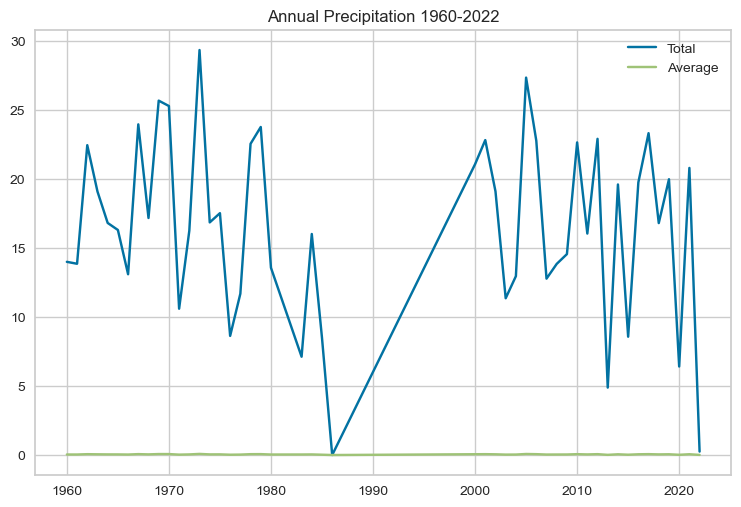

In [31]:
prcp_sum_avg = df.groupby(by=df.index.year).agg({'precipitation':[np.sum, np.mean]})
prcp_sum_avg.columns = ['sum', 'mean']

plt.plot(prcp_sum_avg.index, prcp_sum_avg['sum'])
plt.plot(prcp_sum_avg.index, prcp_sum_avg['mean'])
plt.title('Annual Precipitation 1960-2022')
plt.legend(['Total', 'Average'])
plt.show()

Total annual precipitation across the 60-year period recorded in the dataset seems to vary on a year-on-year basis. However, we see a significant dip in the data between the late 80s and the early 2000s. Average precipitation each year is in the 0 range, which implies that all the rainfall in any given year occurs in a short span of time.

**Temperature**

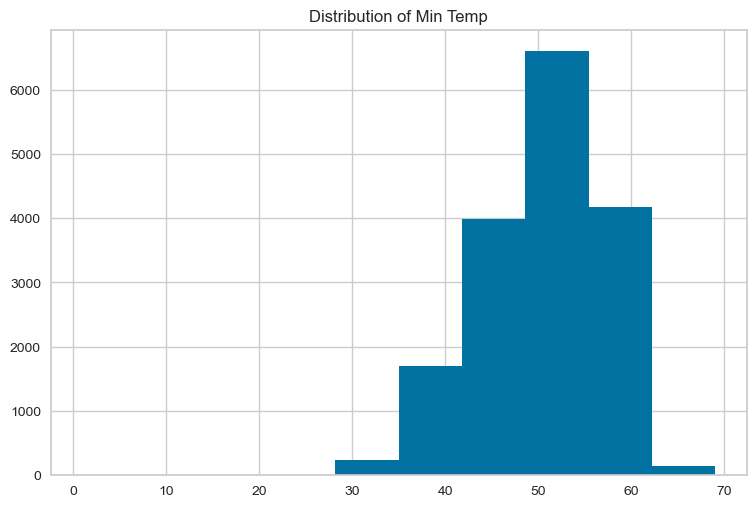

In [32]:
df['min_temp'].hist()
plt.title('Distribution of Min Temp')
plt.show()

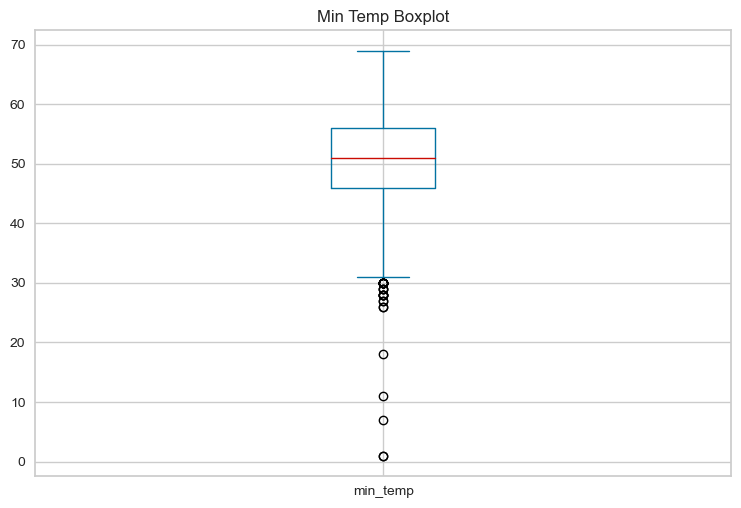

In [33]:
df['min_temp'].plot.box()
plt.title('Min Temp Boxplot')
plt.show()

Most of the minimum temperature is a normal distribution within the range of 30 - 70 degrees Fahrenheit. However, a few outliers exist to make the distribution left-skewed.

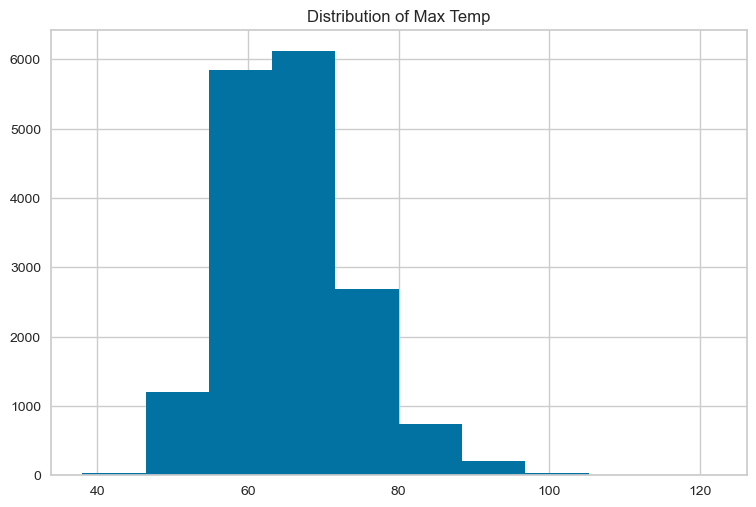

In [34]:
df['max_temp'].hist()
plt.title('Distribution of Max Temp')
plt.show()

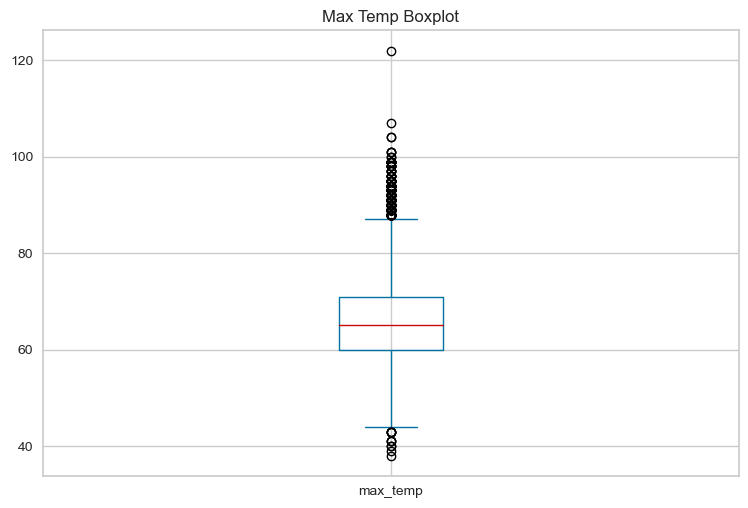

In [35]:
df['max_temp'].plot.box()
plt.title('Max Temp Boxplot')
plt.show()

Most of the maximum temperature is a normal distribution within the range of 40 - 85 degrees Fahrenheit. However, a few outliers exist to make the distribution right-skewed.

Let's plot temperature over time.

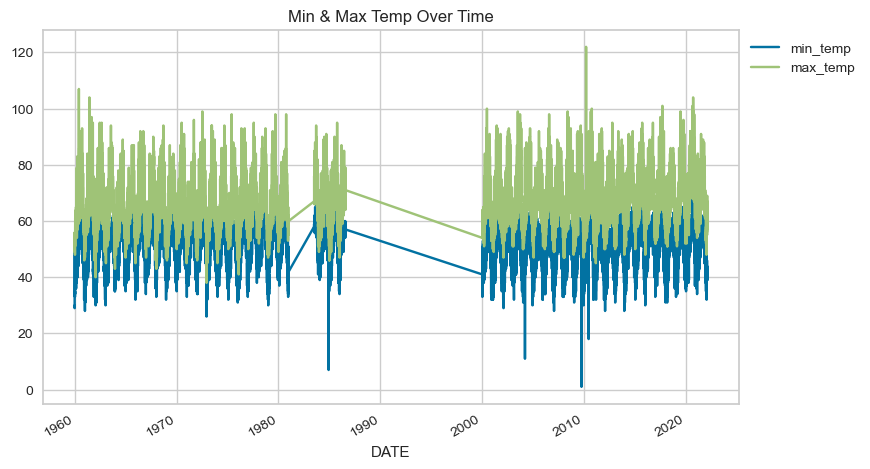

In [36]:
df[["min_temp", "max_temp"]].plot()
plt.title('Min & Max Temp Over Time')
plt.legend(['min_temp', 'max_temp'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

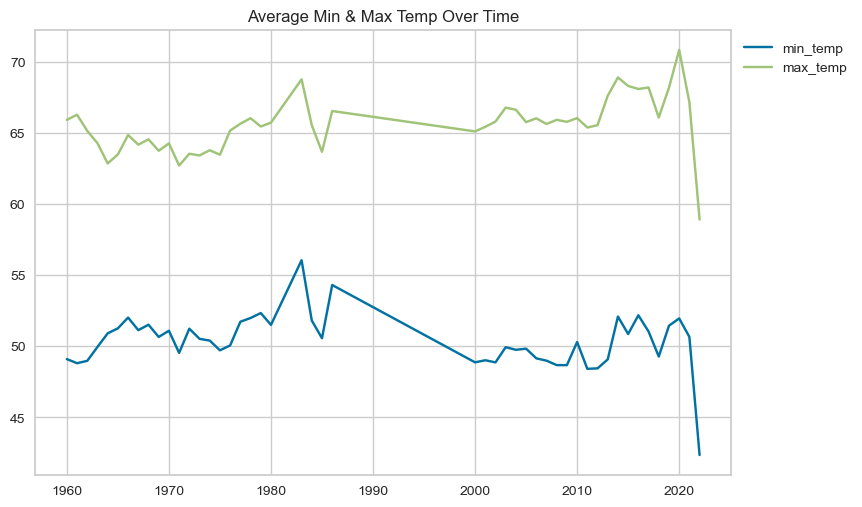

In [37]:
avg_temp = df.groupby(by=df.index.year).agg({'max_temp': np.mean, 'min_temp':np.mean})

plt.plot(avg_temp.index, avg_temp['min_temp'])
plt.plot(avg_temp.index, avg_temp['max_temp'])
plt.title('Average Min & Max Temp Over Time')
plt.legend(['min_temp', 'max_temp'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.show()

Generally, the beginning of the dataset (1960) is a cold year with only 10-15 degrees between the average min & max temps, all of which are under 70 degrees. From the 80s, we see a signifiant rise in min and max temps which decreases inn the 2000s and restarts the climb again.

Note that there's a dip in the temperature charts around the same period as reflected in the precipitation time chart. This may be due to missing data.

**Missing Dates**

In [38]:
missing_dates = pd.date_range(start = '1960-01-01', end = '2022-01-28' ).difference(df.index).tolist()
missing_dates = pd.Series(missing_dates)
missing_dates.head()

0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
dtype: datetime64[ns]

In [39]:
missing_df = missing_dates.groupby(by=[missing_dates.dt.year, missing_dates.dt.month]).agg('count').reset_index()
missing_df.columns = ['year', 'month', 'days']

missing_df

,year,month,days
0,1981,1,31
1,1981,2,28
2,1981,3,31
3,1981,4,30
4,1981,5,31
5,1981,6,30
6,1981,7,31
7,1981,8,31
8,1981,9,30
9,1981,10,31


### Training an Initial Model

**Target Field**

Our target field is the max temperature for the following day.

In [40]:
df["target"] = df.shift(-1)["max_temp"]
df.head()

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0


The final row has no target data, so we'll drop it.

In [41]:
df.tail()

,precipitation,max_temp,min_temp,target
DATE,,,,
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0
2022-01-27,0.0,67.0,39.0,64.0
2022-01-28,0.0,64.0,39.0,NaN


In [42]:
df.drop(labels='2022-01-28', axis=0, inplace=True)
df.tail()

,precipitation,max_temp,min_temp,target
DATE,,,,
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0
2022-01-27,0.0,67.0,39.0,64.0


**Train & Test Data**

In [43]:
X = df[['precipitation', 'max_temp', 'min_temp']]
y = df['target']

We'll split the data into training and test sets, respecting the order of the data.

In [44]:
X_train = X.loc[:"2020-12-31"]
y_train = y.loc[:"2020-12-31"]

X_test = X.loc["2021-01-01":]
y_test = y.loc["2021-01-01":]

**Finding the Optimum Machine Learning Model**

We'll test the following models to determine the optimum model:
* Linear Regression
* Polynomial Regression (Quadratic)
* Cubic Spline Regression
* Ridge Regression
* Lasso Regression

In [45]:
lin_m = LinearRegression()
lin_cv = cross_val_score(lin_m, X, y, cv=5, scoring="neg_mean_squared_error")

print("Linear Model, Avg Test MSE: ", np.mean(lin_cv))
print("Linear Model, Avg Test St. Dev.: ", np.std(lin_cv))

Linear Model, Avg Test MSE:  -21.98217590572134
Linear Model, Avg Test St. Dev.:  2.2644635255873715


In [46]:
quad_m = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)
quad_X = poly.fit_transform(X)

quad_cv = cross_val_score(quad_m, quad_X, y, cv=5, scoring="neg_mean_squared_error")


print("Quadratic Model, Avg Test MSE: ", np.mean(quad_cv))
print("Quadratic Model, Avg Test St. Dev.: ", np.std(quad_cv))

Quadratic Model, Avg Test MSE:  -21.66091832136492
Quadratic Model, Avg Test St. Dev.:  2.1614009901925497


In [47]:
spline_m = LinearRegression()
spline = SplineTransformer(degree=3, n_knots=2)
spline_X = spline.fit_transform(X)
spline_cv = cross_val_score(spline_m, spline_X, y, cv=5, scoring="neg_mean_squared_error")

print("Cubic Spline Model, Avg Test MSE: ", np.mean(spline_cv))
print("Cubic Spline Model, Avg Test St. Dev.: ", np.std(spline_cv))

Cubic Spline Model, Avg Test MSE:  -21.677725024881415
Cubic Spline Model, Avg Test St. Dev.:  2.051703278971109


In [48]:
ridge_m = RidgeCV(alphas=np.linspace(1, 10000, num=1000))
ridge_cv = cross_val_score(ridge_m, X, y, cv=5, scoring="neg_mean_squared_error")

# print(ridge_m.alpha_)
print("Ridge Model, Avg Test MSE: ", np.mean(ridge_cv))
print("Ridge Model, Avg Test St. Dev.: ", np.std(ridge_cv))

Ridge Model, Avg Test MSE:  -21.982295989614776
Ridge Model, Avg Test St. Dev.:  2.2649675993909546


In [49]:
lasso_m = LassoCV(alphas=np.linspace(1, 10, num=100))
lasso_cv = cross_val_score(lasso_m, X, y, cv=5, scoring="neg_mean_squared_error")

# print(lasso_m.alpha_)
print("Lasso Model, Avg Test MSE: ", np.mean(lasso_cv))
print("Lasso Model, Avg Test St. Dev.: ", np.std(lasso_cv))

Lasso Model, Avg Test MSE:  -22.148836041635356
Lasso Model, Avg Test St. Dev.:  2.247662755174318


All the model MSEs are in the same range, although the Cubic Spline Model has the smallest MSE.

**Initializing a Model**

We'll use the ridge and spline models.

In [50]:
ridge_m = RidgeCV(alphas=np.linspace(1, 10000, num=1000))
ridge_m.fit(X_train, y_train)

print('Ridge Train Accuracy: ', ridge_m.score(X_train, y_train))
print('Ridge Alpha: ', ridge_m.alpha_)

Ridge Train Accuracy:  0.6896217032237999
Ridge Alpha:  11.00900900900901


In [51]:
spline_m = LinearRegression()
spline = SplineTransformer(degree=3, n_knots=2)
spline_X_train = spline.fit_transform(X_train)
spline_m.fit(spline_X_train, y_train)

print('Spline Train Accuracy: ', spline_m.score(spline_X_train, y_train))

Spline Train Accuracy:  0.6952705219431641


Train Accuracy on both models is quite low.

### Measuring Accuracy

**Ridge Model**

In [52]:
y_pred_r = ridge_m.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_r)
ridge_mse

20.557648916981886

In [53]:
r2 = r2_score(y_test, y_pred_r)
print("Ridge Accuracy is {}%".format(round(r2, 2) *100))

Ridge Accuracy is 65.0%


Train accuracy is only slightly less than test accuracy on the ridge model and the MSE is low. This is a good model.

In [54]:
residuals = y_test - y_pred_r

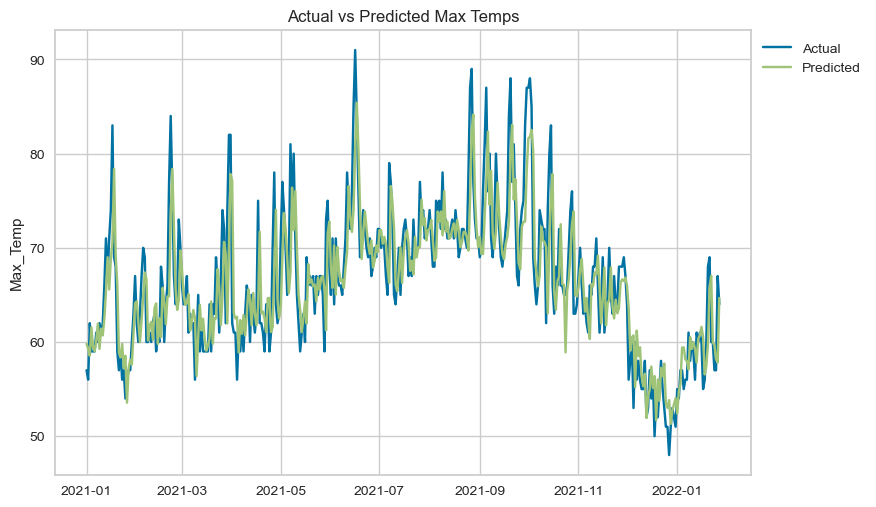

In [55]:
plt.plot(y_test)
plt.plot(y_test.index, y_pred_r)
plt.ylabel('Max_Temp')
plt.legend(['Actual', 'Predicted'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Actual vs Predicted Max Temps')
plt.show()

From our chart, the model struggles to predict the outlier values, i.e. it fails to predict the peak temperatures.

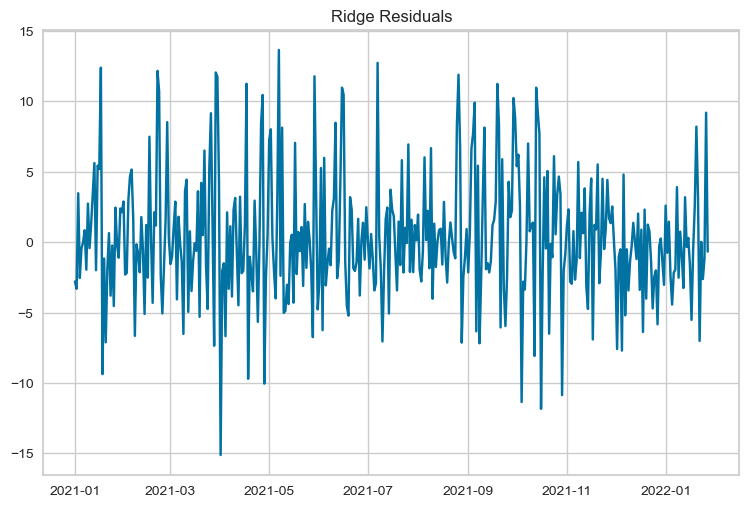

In [56]:
plt.plot(y_test.index, residuals)
plt.title('Ridge Residuals')
plt.show()

**Cubic Splines Model**

In [57]:
spline_X_test = spline.fit_transform(X_test)
y_pred_s = spline_m.predict(spline_X_test)

spline_mse = mean_squared_error(y_test, y_pred_s)
spline_mse

47.70245439378197

In [58]:
r2 = r2_score(y_test, y_pred_s)
print("Cubic Spline Accuracy is {}%".format(round(r2, 2) *100))

Cubic Spline Accuracy is 20.0%


Cubic Spline Accuracy significantly drops for test data. This implies an overfit model. The ridge regression model performs significantly better.

### Building a Prediction Function

We'll write a function to split the data, training a model, and making predictions.

In [59]:
def temp_prediction(X, y, model):
    tss = TimeSeriesSplit(n_splits=3, test_size=800)
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    accuracy = r2_score(y_test, y_pred)
    df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index)], axis=1)
    df.columns = ["actual", "predictions"]

    return error, accuracy, df


In [60]:
error, accuracy, compare_df = temp_prediction(X, y, ridge_m)
print('MSE: ', error)
print('Accuracy: ', accuracy)

MSE:  23.37526072737151
Accuracy:  0.7038808912666568


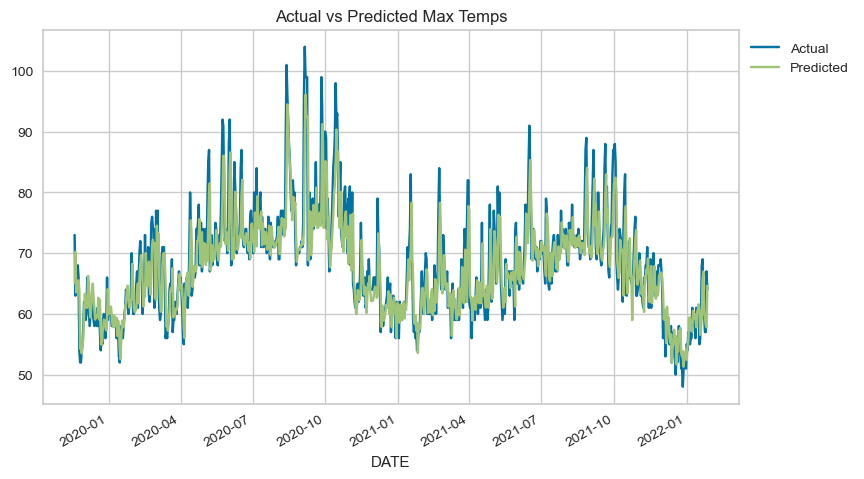

In [61]:
compare_df.plot()
plt.legend(['Actual', 'Predicted'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Actual vs Predicted Max Temps')
plt.show()

### Adding in Rolling Means

We'll add some predictors to the model to improve our accuracy. These predictors will be rolling averages of the temperature during a certain time period. For example, if the temperature on average in the last week has been 70F but is 80F today, today might be unseasonably warm, and the temperature might be lower tomorrow.

Then we'll retest the model and evaluate accuracy.

In [62]:
df['rolling_mean_7'] = df['max_temp'].rolling(7).mean()
df['rolling_mean_30'] = df['max_temp'].rolling(30).mean()

In [63]:
df['min_month_ratio'] = df['rolling_mean_30'] / df['min_temp']
df['max_month_ratio'] = df['rolling_mean_30'] / df['max_temp']
df['max_min'] = df['max_temp'] / df['min_temp']

In [64]:
df.tail()

,precipitation,max_temp,min_temp,target,rolling_mean_7,rolling_mean_30,min_month_ratio,max_month_ratio,max_min
DATE,,,,,,,,,
2022-01-23,0.0,60.0,41.0,60.0,61.142857,56.900000,1.387805,0.948333,1.463415
2022-01-24,0.0,60.0,39.0,57.0,61.142857,57.066667,1.463248,0.951111,1.538462
2022-01-25,0.0,57.0,43.0,57.0,61.428571,57.200000,1.330233,1.003509,1.325581
2022-01-26,0.0,57.0,41.0,67.0,61.571429,57.400000,1.400000,1.007018,1.390244
2022-01-27,0.0,67.0,39.0,64.0,62.571429,57.933333,1.485470,0.864677,1.717949


In [65]:
df.isnull().sum()

precipitation       0
max_temp            0
min_temp            0
target              0
rolling_mean_7      6
rolling_mean_30    29
min_month_ratio    29
max_month_ratio    29
max_min             0
dtype: int64

**Retesting the Model**

In [66]:
df_test = df.dropna()

In [67]:
X = df_test.drop(columns=['target'])
y = df_test['target']

In [68]:
error, accuracy, compare_df = temp_prediction(X, y, ridge_m)
print('MSE: ', error)
print('Accuracy: ', accuracy)

MSE:  22.493766962816544
Accuracy:  0.7150477035199363


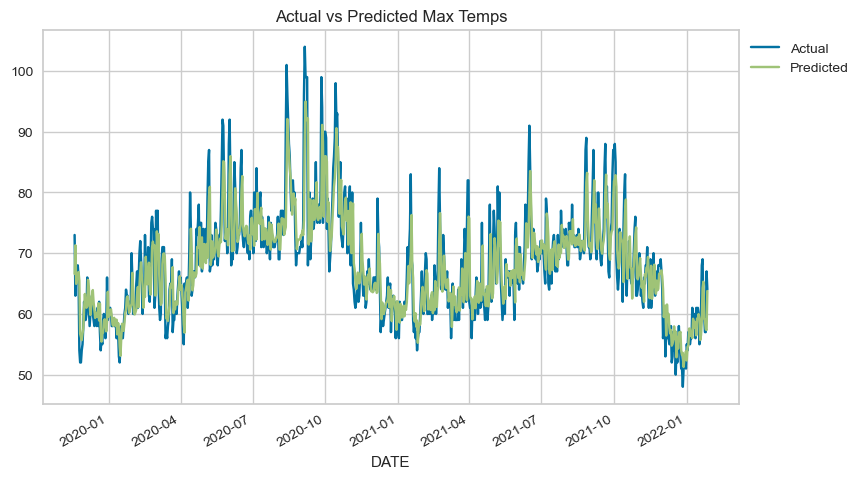

In [69]:
compare_df.plot()
plt.legend(['Actual', 'Predicted'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Actual vs Predicted Max Temps')
plt.show()

The accuracy in this model is slightly better.

### Adding in Monthly & Daily Averages
We will try some more predictors to continue improving our accuracy. We'll add in the historical monthly and daily temperatures. For example, if January 10th has been 40F for the past 10 years but is 60F this year, it might be unseasonably warm.

We have to be careful to only use past data to find the average temperature. We can't use data from 2011 in a daily average temperature from 2009.

In [70]:
df["monthly_avg"] = df["max_temp"].groupby(df.index.month).apply(lambda x: x.expanding(1).mean())
df["day_of_year_avg"] = df["max_temp"].groupby(df.index.day_of_year).apply(lambda x: x.expanding(1).mean())

df.tail()

,precipitation,max_temp,min_temp,target,rolling_mean_7,rolling_mean_30,min_month_ratio,max_month_ratio,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,,
2022-01-23,0.0,60.0,41.0,60.0,61.142857,56.900000,1.387805,0.948333,1.463415,56.749482,57.191489
2022-01-24,0.0,60.0,39.0,57.0,61.142857,57.066667,1.463248,0.951111,1.538462,56.751724,57.297872
2022-01-25,0.0,57.0,43.0,57.0,61.428571,57.200000,1.330233,1.003509,1.325581,56.751895,57.404255
2022-01-26,0.0,57.0,41.0,67.0,61.571429,57.400000,1.400000,1.007018,1.390244,56.752066,57.638298
2022-01-27,0.0,67.0,39.0,64.0,62.571429,57.933333,1.485470,0.864677,1.717949,56.759119,57.872340


In [71]:
df_test2 = df.dropna()

X = df_test2.drop(columns=['target'])
y = df_test2['target']

In [72]:
error, accuracy, compare_df = temp_prediction(X, y, ridge_m)
print('MSE: ', error)
print('Accuracy: ', accuracy)

MSE:  22.475311291216
Accuracy:  0.7152815009987824


Add in an average monthly temperature column. Only use years before the current year.
Add in an average daily temperature column. Only use data before the current year.
Re-run the model, and evaluate accuracy.

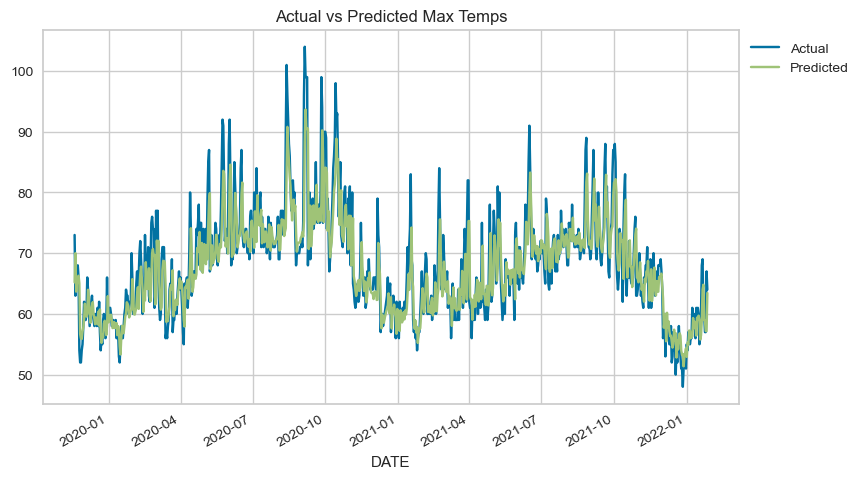

In [73]:
compare_df.plot()
plt.legend(['Actual', 'Predicted'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Actual vs Predicted Max Temps')
plt.show()

**Determine the Relevant Features**

Let's use feature importance and feature selector to determine the 4 important features and model again.

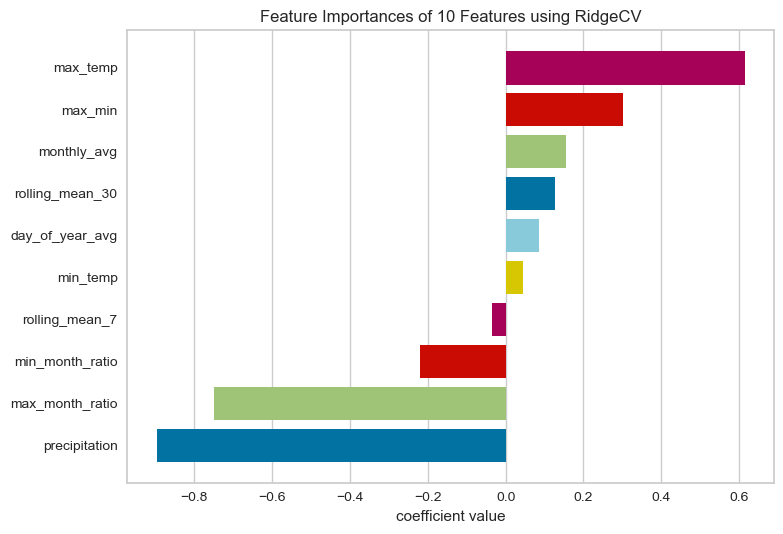

<Axes: title={'center': 'Feature Importances of 10 Features using RidgeCV'}, xlabel='coefficient value'>

In [74]:
viz = FeatureImportances(ridge_m,relative=False)

viz.fit(X, y)
viz.show()

In [75]:
forward = SequentialFeatureSelector(estimator=ridge_m,
                                    n_features_to_select=4,
                                    direction="forward")
forward.fit(X, y)
forward_features = forward.get_feature_names_out()
print(forward_features)

['max_temp' 'rolling_mean_30' 'max_month_ratio' 'monthly_avg']


In [76]:
backward = SequentialFeatureSelector(estimator=ridge_m,
                                     n_features_to_select=4,
                                     direction="backward")
backward.fit(X, y)
backward_features = backward.get_feature_names_out()
print(backward_features)

['max_temp' 'rolling_mean_30' 'max_month_ratio' 'monthly_avg']


In [78]:
error, accuracy, compare_df = temp_prediction(X[['max_temp', 'rolling_mean_30', 'max_month_ratio', 'monthly_avg']], y, ridge_m)
print('MSE: ', error)
print('Accuracy: ', accuracy)

MSE:  22.56183832712152
Accuracy:  0.7141853716741722


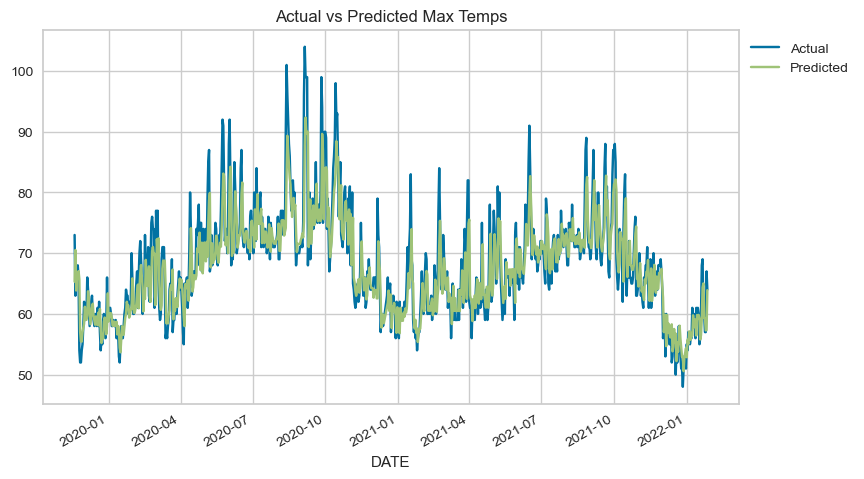

In [79]:
compare_df.plot()
plt.legend(['Actual', 'Predicted'],
           loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Actual vs Predicted Max Temps')
plt.show()

### Conclusion
At 71.5% accuracy and 22.4 MSE, the ridge model incorporating the min/max temperatures and rolling averages is the best model.

### Next Steps
* Try using data from your (another) city. You can download this data from NOAA.
* Predict the weather seven days ahead (for an entire week). This will mirror a real weather forecast.
* Use data from multiple weather stations in a region. You can use this to fill in gaps in the data or to add more predictors.
* Use other columns in the original data as predictors. The data dictionary will be helpful to you.
* Create more predictor columns, like weekly average temperature.
* Use a different machine learning algorithm.
* Implement backtesting, so you can generate predictions for many years and evaluate accuracy more robustly.